In [1]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [2]:
# Load .env environment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [3]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-06-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-06-05", tz="America/New_York").isoformat()

In [5]:
# Set the tickers
tickers = ["FB", "TWTR"]

In [6]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [7]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_portfolio

FB                                       TWTR  \
                             open    high       low   close    volume   open   
time                                                                           
2020-06-01 00:00:00-04:00  224.59  232.44  223.5000  231.94  33886754  31.06   
2020-06-02 00:00:00-04:00  230.94  233.00  226.5600  232.83  36197240  32.19   
2020-06-03 00:00:00-04:00  232.11  232.65  228.5300  230.06  28224941  32.61   
2020-06-04 00:00:00-04:00  229.56  231.63  224.6100  226.29  15405418  34.50   
2020-06-05 00:00:00-04:00  226.71  231.35  225.3105  230.78  14358315  34.47   

                                                            
                             high    low   close    volume  
time                                                        
2020-06-01 00:00:00-04:00  32.100  30.84  31.890  26975226  
2020-06-02 00:00:00-04:00  32.425  31.61  32.260  26812168  
2020-06-03 00:00:00-04:00  35.040  32.44  34.890  52237816  
2020-06-04 00:00:00-04:00  34.940  33.34  33.730  33835688  
2020-06-05 00:00:00-04:00  35.970  34.47  34.855  43954972

In [9]:
fb_close = df_portfolio["FB"]["close"]
fb_close

time
2020-06-01 00:00:00-04:00    231.94
2020-06-02 00:00:00-04:00    232.83
2020-06-03 00:00:00-04:00    230.06
2020-06-04 00:00:00-04:00    226.29
2020-06-05 00:00:00-04:00    230.78
Name: close, dtype: float64

In [10]:
# Create an empty DataFrame for closing prices
closing_prices_df = pd.DataFrame()

# Get the closing prices of FB and TWTR
closing_prices_df["FB"] = df_portfolio["FB"]["close"]
closing_prices_df["TWTR"] = df_portfolio["TWTR"]["close"]

# Drop the time component of the date
closing_prices_df.index = closing_prices_df.index.date

# Display sample data
closing_prices_df.head(10)

,FB,TWTR
2020-06-01,231.94,31.890
2020-06-02,232.83,32.260
2020-06-03,230.06,34.890
2020-06-04,226.29,33.730
2020-06-05,230.78,34.855


In [13]:
# Compute daily returns
daily_returns_df = closing_prices_df.pct_change().dropna()

# Display sample data
daily_returns_df.head(10)

,FB,TWTR
2020-06-02,0.003837,0.011602
2020-06-03,-0.011897,0.081525
2020-06-04,-0.016387,-0.033247
2020-06-05,0.019842,0.033353


<AxesSubplot:title={'center':'Daily Returns of FB and TWTR - June 2020'}>

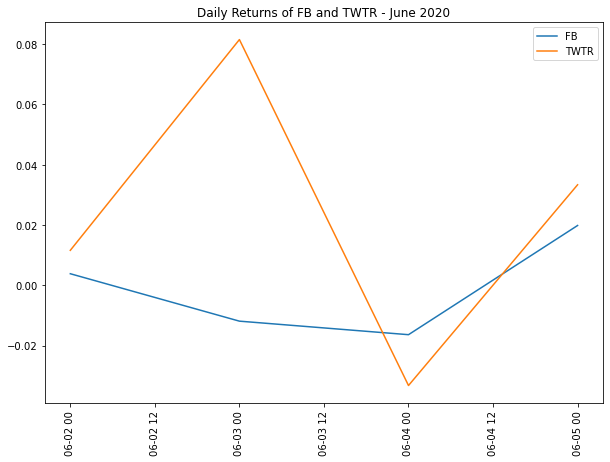

In [14]:
# Plot daily returns
daily_returns_df.plot(figsize=(10, 7), title="Daily Returns of FB and TWTR - June 2020", rot=90)